<a href="https://colab.research.google.com/github/Appanenilikhitha7/Breast_Cancer_Detection/blob/main/BCD_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('/content/sample_data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# counting values of variables in 'diagnosis'
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


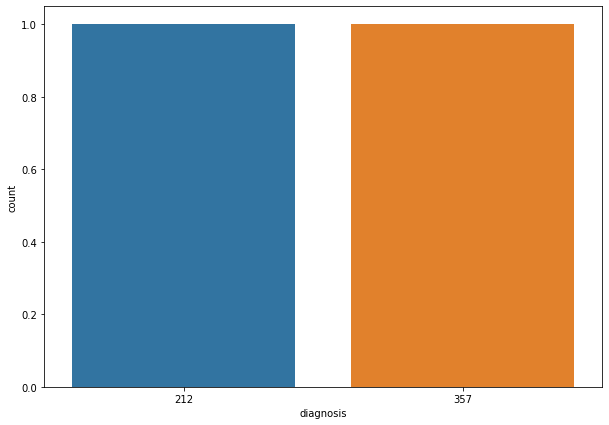

In [5]:
plt.figure(figsize=[10,7])
sb.countplot(df['diagnosis'].value_counts())
plt.show()

In [8]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#droping feature
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [7]:
# independent variables
x = df.drop('diagnosis',axis=1)
#dependent variables
y = df.diagnosis

In [8]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=40)

In [10]:
#importing StandardScaler
from sklearn.preprocessing import StandardScaler
#creating object
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [11]:
#importing keras
import keras
#importing sequential module
from keras.models import Sequential
# import dense module for hidden layers
from keras.layers import Dense
#importing activation functions
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [12]:
#creating model
classifier = Sequential()

In [13]:
#first hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))
#second hidden layer
classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [14]:
#taking summary of layers
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 279       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [15]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
#fitting the ANN to the training set
model = classifier.fit(xtrain,ytrain,batch_size=100,epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 1.3773 - accuracy: 0.3744
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2914 - accuracy: 0.3769
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2150 - accuracy: 0.3819
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1363 - accuracy: 0.3920
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0669 - accuracy: 0.4020
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0032 - accuracy: 0.4020
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9429 - accuracy: 0.4070
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8891 - accuracy: 0.4196
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8407 - accuracy: 0.4548
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7981 - accuracy: 0.4899
Epoch 11/100
4/4 [===========

In [17]:
#now testing for Test data
y_pred = classifier.predict(xtest)
y_pred = (y_pred>0.5)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(ytest,y_pred))

print(classification_report(ytest,y_pred))


cm = confusion_matrix(ytest,y_pred)

[[112   3]
 [  1  55]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.95      0.98      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



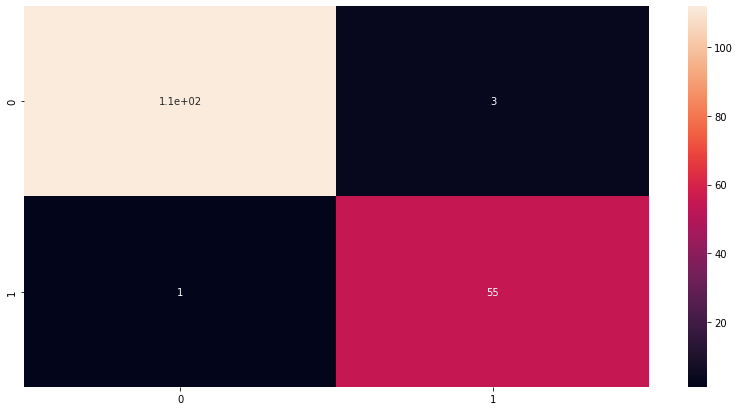

In [21]:
# creating heatmap of comfussion matrix
plt.figure(figsize=[14,7])
sb.heatmap(cm,annot=True)
plt.show()

dict_keys(['loss', 'accuracy'])


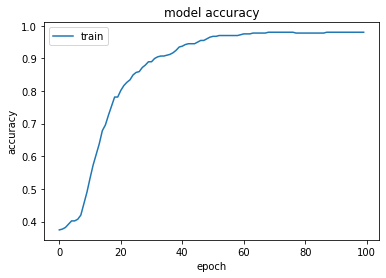

In [22]:
# list all data in history
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

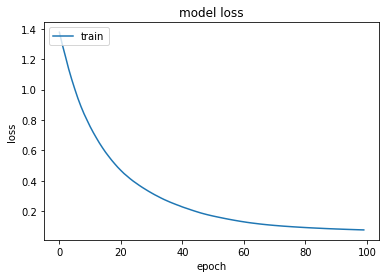

In [23]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
#linear kernel
from sklearn.svm import SVC
svcclassifier=SVC(kernel='linear')
svcclassifier.fit(xtrain,ytrain)

y_pred=svcclassifier.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[113   2]
 [  2  54]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.96      0.96      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [25]:
#guassian kernel
from sklearn.svm import SVC
svcclassifier=SVC(kernel='rbf')
svcclassifier.fit(xtrain,ytrain)

y_pred=svcclassifier.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[114   1]
 [  1  55]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       115
           1       0.98      0.98      0.98        56

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [26]:
#sigmoid kernel
from sklearn.svm import SVC
svcclassifier=SVC(kernel='sigmoid')
svcclassifier.fit(xtrain,ytrain)

y_pred=svcclassifier.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[114   1]
 [  3  53]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       115
           1       0.98      0.95      0.96        56

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [27]:
#poly kernel
from sklearn.svm import SVC
svcclassifier=SVC(kernel='poly',degree=2)
svcclassifier.fit(xtrain,ytrain)

y_pred=svcclassifier.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,y_pred))
print(classification_report(ytest,y_pred))

[[115   0]
 [ 22  34]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       115
           1       1.00      0.61      0.76        56

    accuracy                           0.87       171
   macro avg       0.92      0.80      0.83       171
weighted avg       0.89      0.87      0.86       171

